# Entendendo as RDDs

In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
#Criação de uma RDD simples
rdd1 = sc.parallelize([1,2,3])

# apresentando os dados da variavel. Não funciona com print
rdd1.collect()

In [ ]:
# Utilizando o NumPy. Para trabalhar com amostras.
# Posso pegar uma amostra dos dados para analisar se ficaram corretos após uma transformação, por exemplo

import numpy as np
A = np.array(range(100))
A

In [ ]:
rdd2 = sc.parallelize(np.array(range(100)))


In [ ]:
rdd2.take(10)

In [ ]:
#Verificando a paralelização
#Observe que a paralelização da RDD não ocorreu. Ela não foi dividida.

rdd3 = sc.parallelize(np.array(range(100)))


In [ ]:
# glom mostra os dados que estão dentro da partição
print(rdd3.glom().collect())

# O particionamento das RDDs é feito por padrão pelo tamanho do cluster, mas também podemos especificar explicitamente, de preferência com o número de cores do PC.

In [ ]:
# Paralelizando explicitamente

rdd = sc.parallelize(np.array(range(100)), 10)

In [ ]:
print(rdd.getNumPartitions())

In [ ]:
#Verificando a paralelização

print(rdd.glom().collect())

# Paralelizando arquivos

# 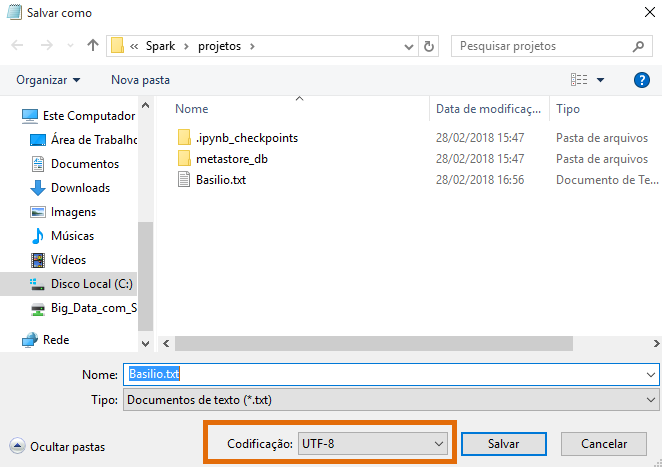

In [ ]:
#Lendo O Primo Basilio - Eça de Queiroz

rdd = sc.textFile("E:\\Projetos\\Spark\\Projetos\\Basilio.txt")



In [ ]:
print(rdd.take(1000))

In [ ]:
print(rdd.getNumPartitions())

In [ ]:
rdd = sc.textFile("Basilio.txt", 100)

In [ ]:
print(rdd.getNumPartitions())


# Leitura da Bíblia

In [ ]:
#Verifique se o arquivo está em ANSI

rddANSI = sc.textFile("Biblia-ANSI.txt")

print(rddANSI.take(1000))

In [ ]:
#Altere o arquivo para UTF-8

rdd = sc.textFile("Biblia-UTF8.txt")

print(rdd.take(1000))

# Transformações

1 - São operações em um RDD que devolvem um novo

2 - Normalmente executam uma função anônima (lambda) sobre cada um dos elementos do RDD

3 - Operam sobre lazy

# Utilizando o Intersect

In [ ]:
dados1 = sc.parallelize(["A","B","C","D","E"])
dados2 = sc.parallelize(["A","E","I","O","U"])

result = dados1.intersection(dados2)
result.take(10)

In [ ]:
jose = rdd.filter(lambda linha: "José" in linha)

In [ ]:
maria = rdd.filter(lambda linha: "Maria" in linha)

In [ ]:
biblia = jose.intersection(maria)

# Ações

1 - São operações em um RDD que devolvem um novo

2 - Normalmente executam uma função anônima (lambda) sobre cada um dos elementos do RDD

3 - Operam sobre lazy

# Utilizando o takeSample

In [ ]:
# TRUE - Possibilita elementos REPETIDOS
# Numero - Indica o tamanho da amostra

rdd = sc.parallelize(np.array(range(10)))
lines = rdd.count()
print("Número de linhas com José e Maria {0}".format(lines))
for l in rdd.takeSample(True,8):
    print(l)


In [ ]:
lines = biblia.count()
print("Número de linhas com José e Maria {0}".format(lines))
for l in biblia.takeSample(False,10):
    print(l)

In [ ]:
for l in biblia.takeSample(False,20):
    print(l)